<a href="https://colab.research.google.com/github/mdmalik09/Soil-Health-Monitoring/blob/main/Mackathon_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("javakhan/crops-npk-data-set")

print("Path to dataset files:", path)

100%|██████████| 1.27M/1.27M [00:00<00:00, 48.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/javakhan/crops-npk-data-set/versions/1


In [ ]:
# CELL 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [5]:
# CELL 2: Load Kaggle Dataset
# Load the dataset (adjust file path as needed)
# The path below is the default download location for the kagglehub dataset.
df = pd.read_csv('/root/.cache/kagglehub/datasets/javakhan/crops-npk-data-set/versions/1/sensor_Crop_Dataset (1).csv')

print("📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 rows:")
print(df.head())
print("\n📋 Column Info:")
print(df.info())
print("\n📈 Basic Statistics:")
print(df.describe())

NameError: name 'pd' is not defined

In [6]:
# Visualize the relationship between Nitrogen and pH_Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Nitrogen', y='Ph_Value', alpha=0.6)
plt.title('Relationship between Nitrogen and pH Value')
plt.xlabel('Nitrogen')
plt.ylabel('pH Value')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# CELL 2: Load Kaggle Dataset
# Load the dataset (adjust file path as needed)
df = pd.read_csv('/kaggle/input/crops-npk-data-set/sensor_Crop_Dataset (1).csv')  # or your actual file name

print("📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 rows:")
print(df.head())
print("\n📋 Column Info:")
print(df.info())
print("\n📈 Basic Statistics:")
print(df.describe())

📊 Dataset Shape: (20000, 10)

🔍 First 5 rows:
     Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0   69.074766   53.954402  88.067625    17.261834  72.941652  4.631301   
1  107.329352   70.102134  32.081067    21.846116  99.361954  4.761658   
2  130.634624   67.204533  28.294252    33.246895  81.506836  6.566007   
3   15.169301   87.493181  14.336679    14.396289  59.274465  6.296297   
4   21.881965   89.269712  38.833885    16.773218  51.191584  8.268274   

     Rainfall       Crop Soil_Type    Variety  
0  302.842639      Wheat      Clay   Soft Red  
1   94.693847     Tomato      Clay  Beefsteak  
2   83.563685  Sugarcane      Clay   Co 86032  
3   31.508836  Sugarcane      Silt    Co 0238  
4  295.193482      Maize     Sandy      Sweet  

📋 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitroge

In [ ]:
import os

# List files in the downloaded directory
download_path = "/kaggle/input/crops-npk-data-set"
print(os.listdir(download_path))

['sensor_Crop_Dataset (1).csv']


In [ ]:
# CELL 3: Data Quality Check
print("🔎 Data Quality Assessment:")
print("Missing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nData Types:")
print(df.dtypes)

# Check unique values in categorical columns
print("\n🌱 Unique Crops:", df['Crop'].unique())
print("Number of unique crops:", df['Crop'].nunique())

# Standardize column names (optional)
df.columns = [col.strip().title() for col in df.columns]
print("\n📝 Standardized Column Names:", df.columns.tolist())

🔎 Data Quality Assessment:
Missing Values:
Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Soil_Type      0
Variety        0
dtype: int64

Duplicate Rows: 0

Data Types:
Nitrogen       float64
Phosphorus     float64
Potassium      float64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
Soil_Type       object
Variety         object
dtype: object

🌱 Unique Crops: ['Wheat' 'Tomato' 'Sugarcane' 'Maize' 'Potato' 'Rice']
Number of unique crops: 6

📝 Standardized Column Names: ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall', 'Crop', 'Soil_Type', 'Variety']


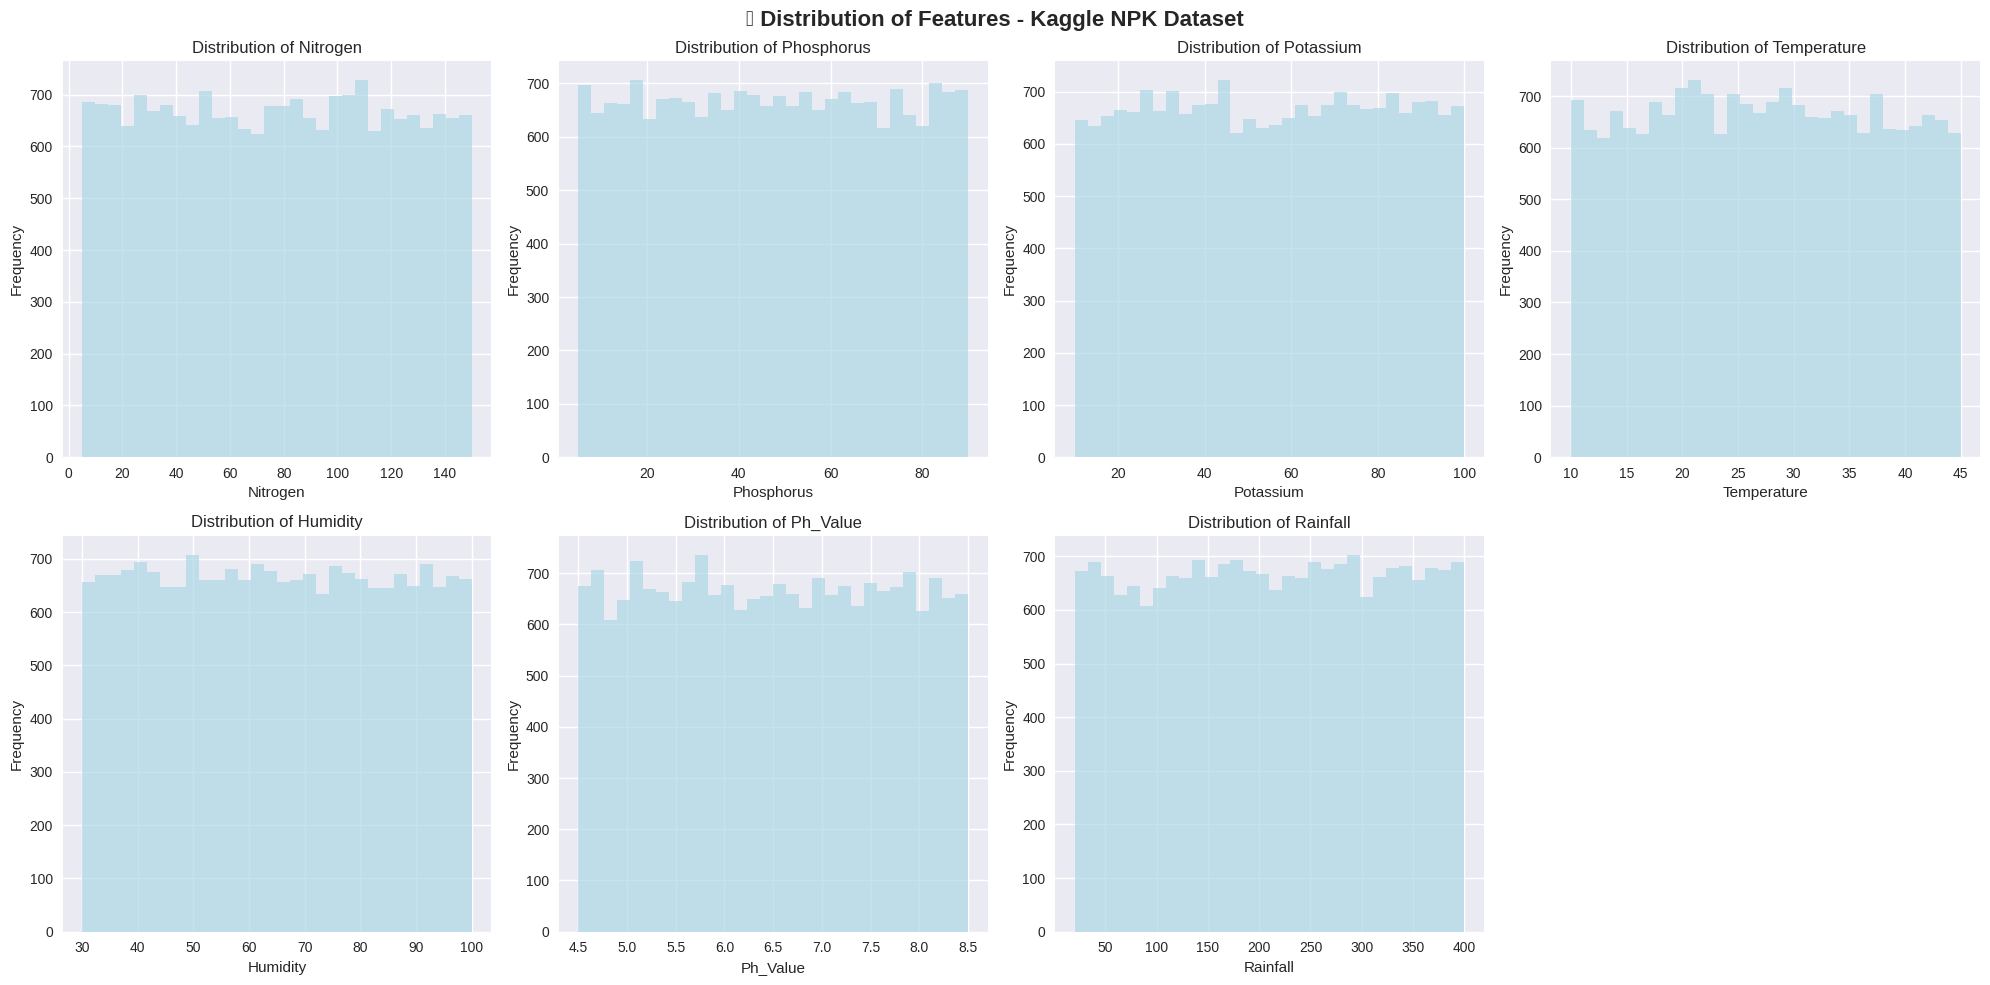

In [ ]:
# CELL 4: Enhanced Visualization
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('📊 Distribution of Features - Kaggle NPK Dataset', fontsize=16, fontweight='bold')

numerical_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall']

for i, col in enumerate(numerical_cols):
    if i < 4:
        ax = axes[0, i]
    else:
        ax = axes[1, i-4]

    df[col].hist(bins=30, ax=ax, alpha=0.7, color='lightblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove the empty subplot
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()

🌾 CROP-SPECIFIC ANALYSIS
          Nitrogen                      Phosphorus                      \
              mean    std   min     max       mean    std   min    max   
Crop                                                                     
Maize        78.53  41.33  5.01  150.00      47.01  24.50  5.05  89.92   
Potato       75.49  41.88  5.06  149.95      47.62  24.52  5.00  90.00   
Rice         76.10  41.68  5.01  149.89      47.78  24.56  5.04  89.98   
Sugarcane    77.96  42.24  5.07  149.97      46.91  24.66  5.01  89.93   
Tomato       76.45  41.50  5.01  149.97      47.10  24.41  5.06  89.88   
Wheat        78.75  42.42  5.03  149.99      48.46  24.86  5.04  89.96   

          Potassium                       Temperature        Ph_Value        \
               mean    std    min     max        mean    std     mean   std   
Crop                                                                          
Maize         54.85  25.80  10.05   99.92       27.44   9.93     6.51  

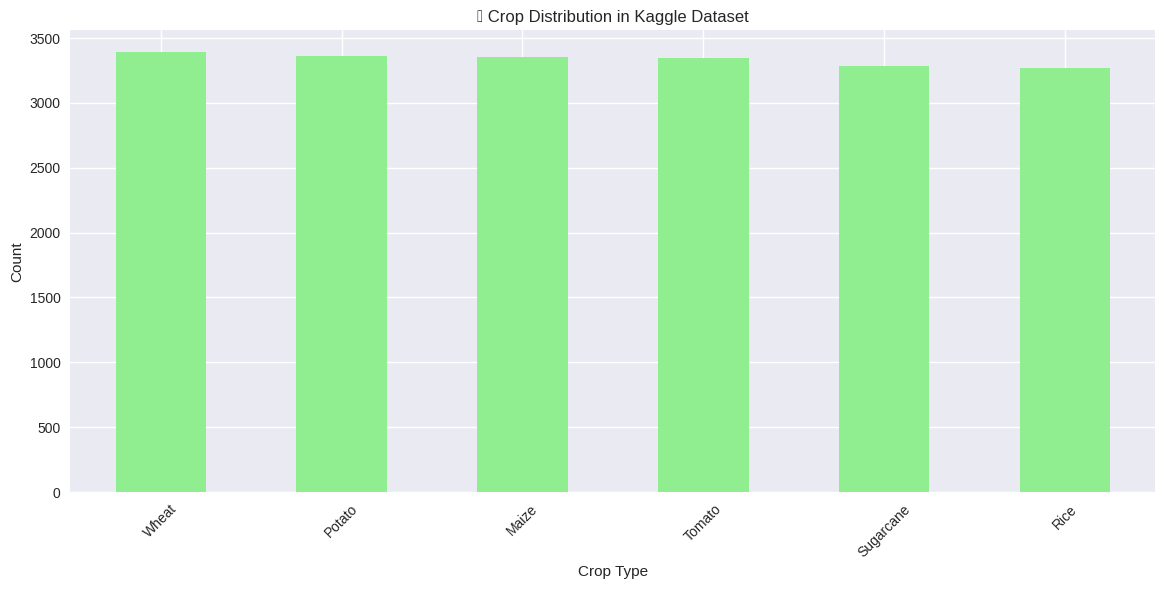

In [ ]:
# CELL 5: Crop-Specific Analysis
print("🌾 CROP-SPECIFIC ANALYSIS")
crop_stats = df.groupby('Crop').agg({
    'Nitrogen': ['mean', 'std', 'min', 'max'],
    'Phosphorus': ['mean', 'std', 'min', 'max'],
    'Potassium': ['mean', 'std', 'min', 'max'],
    'Temperature': ['mean', 'std'],
    'Ph_Value': ['mean', 'std'],
    'Rainfall': ['mean', 'std']
}).round(2)

print(crop_stats)

# Visualize crop distribution
plt.figure(figsize=(14, 6))
df['Crop'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('📊 Crop Distribution in Kaggle Dataset')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# CELL 6: NEW FEATURE - Nutrient Balance Analysis
# Calculate NPK ratios
df['N_P_Ratio'] = df['Nitrogen'] / df['Phosphorus']
df['N_K_Ratio'] = df['Nitrogen'] / df['Potassium']
df['P_K_Ratio'] = df['Phosphorus'] / df['Potassium']

# Soil Health Score (custom metric)
df['Soil_Health_Score'] = (
    (df['Nitrogen'] / df['Nitrogen'].max()) * 0.25 +
    (df['Phosphorus'] / df['Phosphorus'].max()) * 0.25 +
    (df['Potassium'] / df['Potassium'].max()) * 0.25 +
    (1 - abs(df['Ph_Value'] - 6.5) / 3.5) * 0.15 +  # pH closeness to optimal
    (df['Humidity'] / df['Humidity'].max()) * 0.10
)

print("🧪 NEW FEATURES ADDED:")
print("- N:P Ratio, N:K Ratio, P:K Ratio")
print("- Soil Health Score (0-1 scale)")
print("\n📊 New Features Statistics:")
print(df[['N_P_Ratio', 'N_K_Ratio', 'P_K_Ratio', 'Soil_Health_Score']].describe())

🧪 NEW FEATURES ADDED:
- N:P Ratio, N:K Ratio, P:K Ratio
- Soil Health Score (0-1 scale)

📊 New Features Statistics:
          N_P_Ratio     N_K_Ratio     P_K_Ratio  Soil_Health_Score
count  20000.000000  20000.000000  20000.000000       20000.000000
mean       2.635853      1.959855      1.203284           0.570461
std        3.215733      1.931278      1.158950           0.122594
min        0.058917      0.052245      0.053783           0.181222
25%        0.863912      0.736293      0.478029           0.483955
50%        1.622995      1.393294      0.855493           0.571976
75%        2.971400      2.406126      1.463404           0.656096
max       28.504055     14.377404      8.961524           0.949054


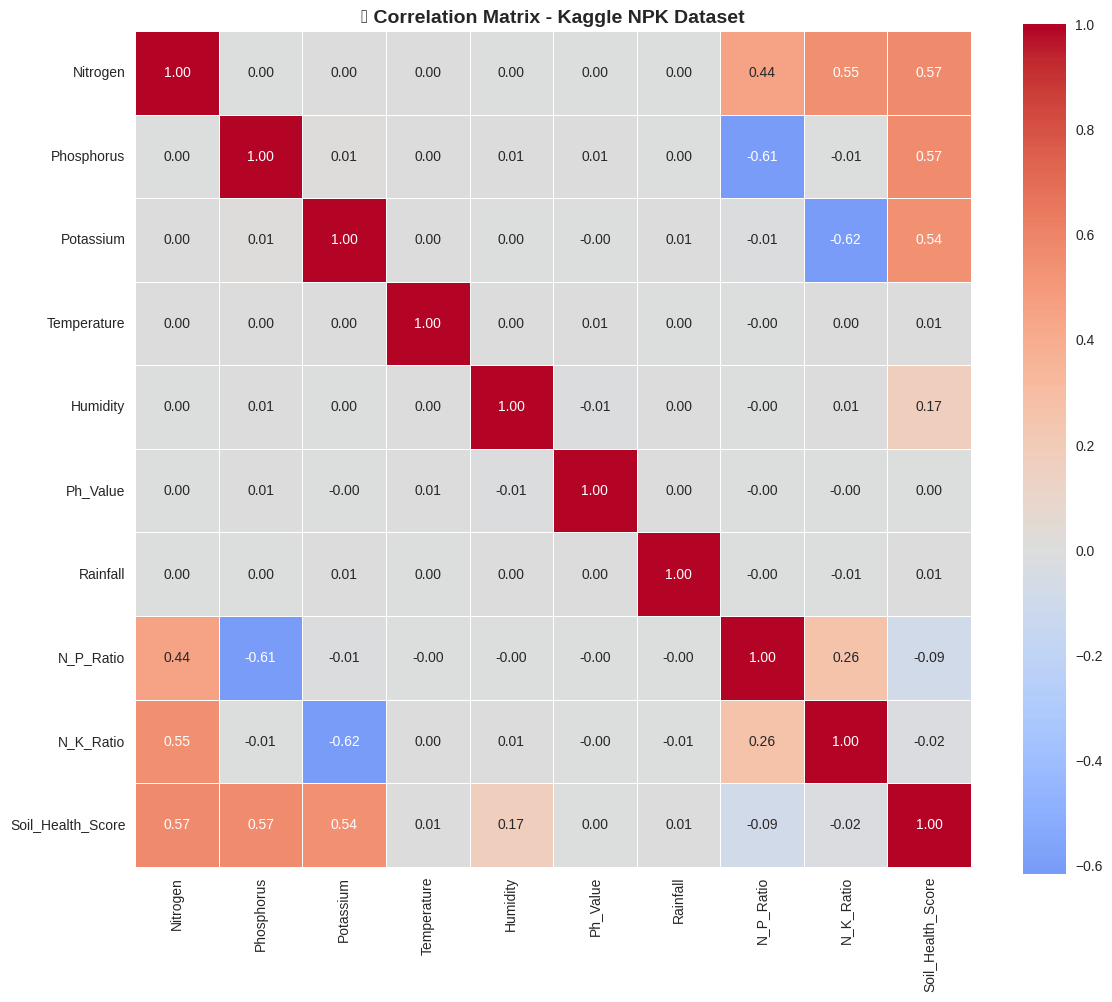

In [ ]:
# CELL 7: Correlation Analysis
plt.figure(figsize=(12, 10))

# Select features for correlation (including new ones)
corr_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall',
                'N_P_Ratio', 'N_K_Ratio', 'Soil_Health_Score']

correlation_matrix = df[corr_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('🔥 Correlation Matrix - Kaggle NPK Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# CELL 8: Crop Prediction Model
# Encode categorical variable
le = LabelEncoder()
df['Crop_Encoded'] = le.fit_transform(df['Crop'])

# Features for prediction (including new features)
feature_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall',
                  'N_P_Ratio', 'N_K_Ratio', 'Soil_Health_Score']

X = df[feature_columns]
y = df['Crop_Encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

print("🤖 Crop Prediction Model Trained!")
print(f"Training Accuracy: {rf_model.score(X_train_scaled, y_train):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

🤖 Crop Prediction Model Trained!
Training Accuracy: 1.000
Test Accuracy: 0.157


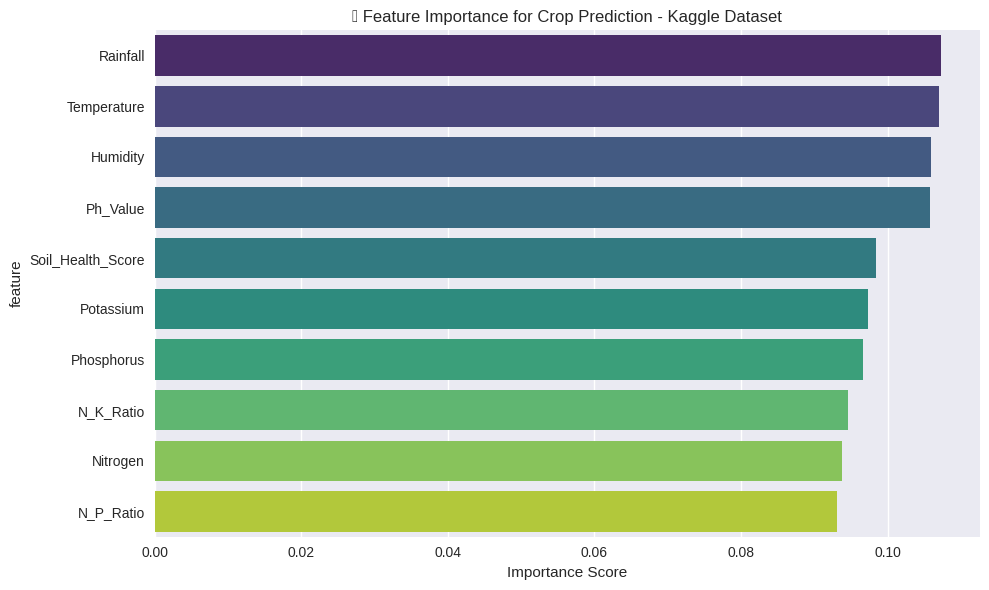

📋 Feature Importance Ranking:
             feature  importance
6           Rainfall    0.107258
3        Temperature    0.107043
4           Humidity    0.105911
5           Ph_Value    0.105794
9  Soil_Health_Score    0.098458
2          Potassium    0.097380
1         Phosphorus    0.096704
8          N_K_Ratio    0.094545
0           Nitrogen    0.093796
7          N_P_Ratio    0.093110


In [ ]:
# CELL 9: Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('🎯 Feature Importance for Crop Prediction - Kaggle Dataset')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("📋 Feature Importance Ranking:")
print(feature_importance)

In [ ]:
# CELL 10: NEW FEATURE - Optimal Range Analysis for Kaggle Dataset
def check_optimal_ranges_kaggle(row):
    """Check if parameters are within optimal ranges for specific crops"""
    crop = row['Crop']

    # Extended optimal ranges based on agricultural knowledge
    optimal_ranges = {
        'rice': {'N': (120, 180), 'P': (20, 40), 'K': (50, 100), 'ph': (5.0, 6.5), 'temp': (20, 35)},
        'maize': {'N': (150, 200), 'P': (30, 50), 'K': (120, 180), 'ph': (5.8, 7.0), 'temp': (18, 32)},
        'chickpea': {'N': (20, 40), 'P': (15, 30), 'K': (20, 40), 'ph': (6.0, 7.5), 'temp': (15, 25)},
        'kidneybeans': {'N': (20, 40), 'P': (20, 40), 'K': (30, 60), 'ph': (6.0, 7.0), 'temp': (20, 30)},
        'pigeonpeas': {'N': (20, 40), 'P': (15, 30), 'K': (20, 40), 'ph': (5.5, 7.0), 'temp': (20, 35)},
        'mothbeans': {'N': (15, 30), 'P': (10, 25), 'K': (15, 30), 'ph': (6.0, 7.5), 'temp': (25, 35)},
        'mungbean': {'N': (15, 30), 'P': (10, 25), 'K': (15, 30), 'ph': (6.0, 7.5), 'temp': (25, 35)},
        'blackgram': {'N': (20, 40), 'P': (15, 30), 'K': (20, 40), 'ph': (6.0, 7.5), 'temp': (25, 35)},
        'lentil': {'N': (15, 30), 'P': (10, 25), 'K': (15, 30), 'ph': (6.0, 7.5), 'temp': (15, 25)},
        'pomegranate': {'N': (100, 150), 'P': (40, 60), 'K': (100, 150), 'ph': (5.5, 7.0), 'temp': (25, 35)},
        'banana': {'N': (200, 250), 'P': (40, 60), 'K': (250, 350), 'ph': (5.5, 7.0), 'temp': (20, 35)},
        'mango': {'N': (100, 150), 'P': (30, 50), 'K': (150, 200), 'ph': (5.5, 7.0), 'temp': (24, 30)},
        'grapes': {'N': (80, 120), 'P': (30, 50), 'K': (150, 200), 'ph': (5.5, 7.0), 'temp': (15, 35)},
        'watermelon': {'N': (100, 150), 'P': (40, 60), 'K': (150, 200), 'ph': (5.5, 6.8), 'temp': (21, 29)},
        'muskmelon': {'N': (100, 150), 'P': (40, 60), 'K': (150, 200), 'ph': (5.5, 6.8), 'temp': (18, 30)},
        'apple': {'N': (80, 120), 'P': (30, 50), 'K': (120, 180), 'ph': (5.5, 6.8), 'temp': (7, 24)},
        'orange': {'N': (100, 150), 'P': (30, 50), 'K': (150, 200), 'ph': (5.5, 7.0), 'temp': (13, 35)},
        'papaya': {'N': (150, 200), 'P': (40, 60), 'K': (200, 250), 'ph': (5.5, 7.0), 'temp': (21, 33)},
        'coconut': {'N': (100, 150), 'P': (30, 50), 'K': (150, 200), 'ph': (5.0, 8.0), 'temp': (20, 32)},
        'cotton': {'N': (80, 120), 'P': (25, 40), 'K': (80, 120), 'ph': (5.5, 7.5), 'temp': (20, 35)},
        'jute': {'N': (60, 100), 'P': (20, 40), 'K': (60, 100), 'ph': (6.0, 7.5), 'temp': (24, 37)},
        'coffee': {'N': (120, 180), 'P': (30, 50), 'K': (150, 200), 'ph': (4.5, 6.0), 'temp': (15, 24)}
    }

    if crop.lower() in optimal_ranges:
        ranges = optimal_ranges[crop.lower()]
        score = 0
        total = 5  # N, P, K, pH, Temperature

        if ranges['N'][0] <= row['Nitrogen'] <= ranges['N'][1]:
            score += 1
        if ranges['P'][0] <= row['Phosphorus'] <= ranges['P'][1]:
            score += 1
        if ranges['K'][0] <= row['Potassium'] <= ranges['K'][1]:
            score += 1
        if ranges['ph'][0] <= row['Ph_Value'] <= ranges['ph'][1]:
            score += 1
        if ranges['temp'][0] <= row['Temperature'] <= ranges['temp'][1]:
            score += 1

        return score / total
    return 0

df['Optimal_Score'] = df.apply(check_optimal_ranges_kaggle, axis=1)
print("✅ Optimal Range Analysis Completed!")
print(f"Average Optimal Score: {df['Optimal_Score'].mean():.3f}")

# Display crops with highest optimal scores
optimal_by_crop = df.groupby('Crop')['Optimal_Score'].mean().sort_values(ascending=False)
print("\n🏆 Crops with Highest Optimal Scores:")
print(optimal_by_crop.head(10))

✅ Optimal Range Analysis Completed!
Average Optimal Score: 0.091

🏆 Crops with Highest Optimal Scores:
Crop
Rice         0.360404
Maize        0.188842
Potato       0.000000
Sugarcane    0.000000
Tomato       0.000000
Wheat        0.000000
Name: Optimal_Score, dtype: float64


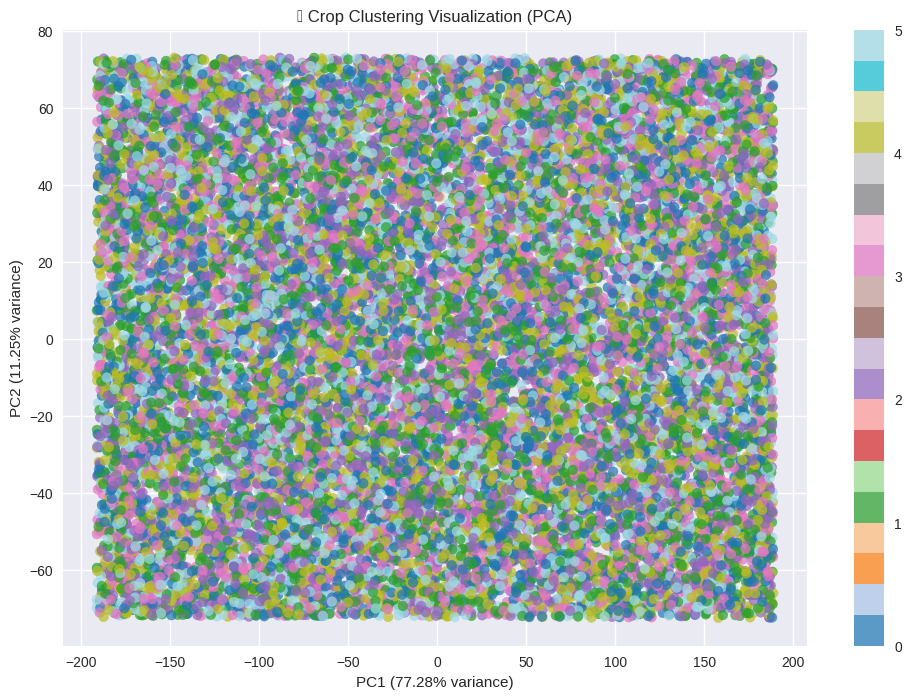

📊 PCA Variance Explained:
PC1: 0.773
PC2: 0.112
Total: 0.885


In [ ]:
# CELL 11: Advanced Visualization - Crop Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Prepare data for clustering
cluster_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall']
X_cluster = df[cluster_features]

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# Create cluster plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Crop_Encoded'],
                     cmap='tab20', alpha=0.7)
plt.colorbar(scatter)
plt.title('🌿 Crop Clustering Visualization (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.show()

print("📊 PCA Variance Explained:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total: {pca.explained_variance_ratio_.sum():.3f}")

In [ ]:
# CELL 12: Results Summary & Export
print("🎉 KAGGLE NPK DATASET ANALYSIS COMPLETED!")
print("\n📊 FINAL DATASET INFO:")
print(f"Original shape: {df.shape}")
print(f"Number of crops: {df['Crop'].nunique()}")
print(f"New features added: {len([col for col in df.columns if col not in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall', 'Crop']])}")

print("\n🧮 NEW FEATURES CREATED:")
new_features = [col for col in df.columns if col not in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'Ph_Value', 'Rainfall', 'Crop']]
print(new_features)

print("\n📈 KEY METRICS:")
print(f"• Average Soil Health Score: {df['Soil_Health_Score'].mean():.3f}")
print(f"• Average Optimal Score: {df['Optimal_Score'].mean():.3f}")
print(f"• Crop Prediction Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"• Best Performing Crop (Optimal): {optimal_by_crop.index[0]} ({optimal_by_crop.iloc[0]:.3f})")

# Export enhanced dataset
df.to_csv('enhanced_kaggle_crop_dataset.csv', index=False)
print("\n💾 Enhanced Kaggle dataset saved as 'enhanced_kaggle_crop_dataset.csv'")

# Display sample of enhanced data
print("\n🔍 Sample of Enhanced Data:")
print(df[['Crop', 'Nitrogen', 'Phosphorus', 'Potassium', 'Soil_Health_Score', 'Optimal_Score']].head(10))

🎉 KAGGLE NPK DATASET ANALYSIS COMPLETED!

📊 FINAL DATASET INFO:
Original shape: (20000, 16)
Number of crops: 6
New features added: 8

🧮 NEW FEATURES CREATED:
['Soil_Type', 'Variety', 'N_P_Ratio', 'N_K_Ratio', 'P_K_Ratio', 'Soil_Health_Score', 'Crop_Encoded', 'Optimal_Score']

📈 KEY METRICS:
• Average Soil Health Score: 0.570
• Average Optimal Score: 0.091
• Crop Prediction Accuracy: 0.157
• Best Performing Crop (Optimal): Rice (0.360)

💾 Enhanced Kaggle dataset saved as 'enhanced_kaggle_crop_dataset.csv'

🔍 Sample of Enhanced Data:
        Crop    Nitrogen  Phosphorus  Potassium  Soil_Health_Score  \
0      Wheat   69.074766   53.954402  88.067625           0.628037   
1     Tomato  107.329352   70.102134  32.081067           0.628689   
2  Sugarcane  130.634624   67.204533  28.294252           0.703830   
3  Sugarcane   15.169301   87.493181  14.336679           0.504713   
4      Maize   21.881965   89.269712  38.833885           0.506945   
5     Tomato   19.660304    6.616578  62.1

In [ ]:
# CELL 13: Advanced Model Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

print("🤖 MODEL COMPARISON:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

🤖 MODEL COMPARISON:
Random Forest: 0.165 (+/- 0.013)


In [ ]:
# CELL 14: Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 80, 100],           # Reduced options
    'max_depth': [10, 15, None],             # Fewer options
    'min_samples_split': [2, 5]              # Only 2 options
}

# RandomizedSearch is MUCH faster than GridSearch
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist,
    n_iter=6,           # Only test 6 random combinations (instead of 27)
    cv=3,               # 3-fold CV instead of 5
    scoring='accuracy',
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

random_search.fit(X_train_scaled, y_train)

print("🎯 Best Parameters:", random_search.best_params_)
print("🏆 Best CV Score:", random_search.best_score_)

<Figure size 1200x1000 with 0 Axes>

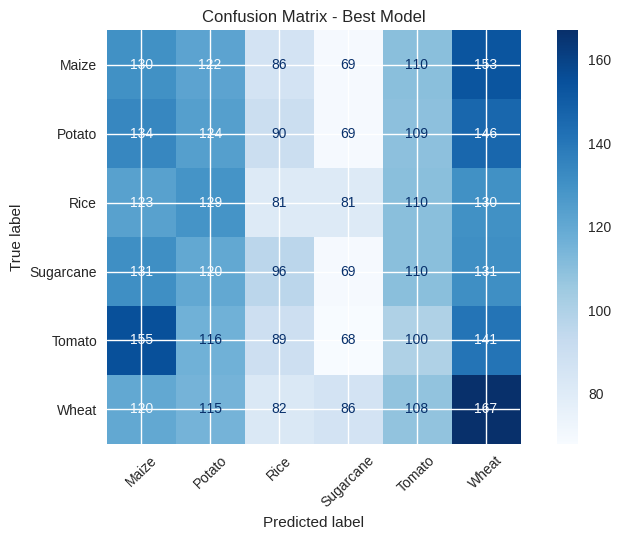

In [ ]:
# CELL 15: Confusion Matrix Analysis
from sklearn.metrics import ConfusionMatrixDisplay

best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best,
                                      display_labels=le.classes_,
                                      cmap='Blues', xticks_rotation=44)
plt.title('Confusion Matrix - Best Model')
plt.tight_layout()
plt.show()

In [ ]:
# CELL 16: Crop Recommendation System
def recommend_crops(n, p, k, temperature, humidity, ph, rainfall):
    """Recommend top 3 crops for given conditions"""
    # Add engineered features
    n_p_ratio = n / p if p > 0 else 0
    n_k_ratio = n / k if k > 0 else 0
    # P_K_Ratio was not used in training, exclude it
    # Optimal_Score was not used in training, exclude it
    # Soil Health Score (custom metric) - Using max values from the training data
    soil_health = (n/df['Nitrogen'].max())*0.25 + (p/df['Phosphorus'].max())*0.25 + (k/df['Potassium'].max())*0.25 + (1-abs(ph-6.5)/3.5)*0.15 + (humidity/df['Humidity'].max())*0.10


    # Construct input data with all features used during training
    input_data = np.array([[n, p, k, temperature, humidity, ph, rainfall,
                            n_p_ratio, n_k_ratio, soil_health]])


    input_scaled = scaler.transform(input_data)
    probabilities = best_model.predict_proba(input_scaled)[0]

    recommendations = []
    for i, prob in enumerate(probabilities):
        recommendations.append((le.classes_[i], prob))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:3]

# Test the recommendation system
test_conditions = [90, 40, 70, 25, 80, 6.5, 150]  # N, P, K, Temp, Humidity, pH, Rainfall
recommendations = recommend_crops(*test_conditions)
print("🌱 TOP 3 CROP RECOMMENDATIONS:")
for crop, prob in recommendations:
    print(f"  {crop}: {prob:.3f} probability")

🌱 TOP 3 CROP RECOMMENDATIONS:
  Maize: 0.175 probability
  Wheat: 0.173 probability
  Potato: 0.165 probability


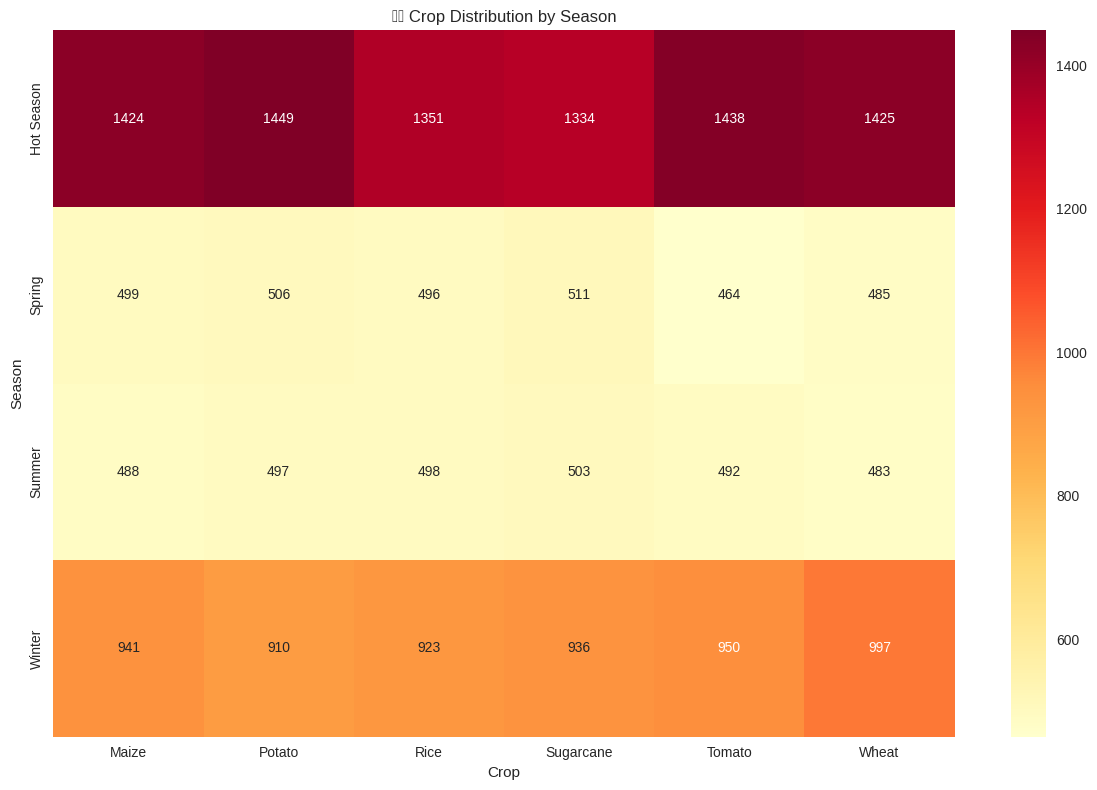

In [ ]:
# CELL 17: Seasonal Analysis
# Create seasonal categories based on temperature
def get_season(temp):
    if temp < 20: return 'Winter'
    elif temp < 25: return 'Spring'
    elif temp < 30: return 'Summer'
    else: return 'Hot Season'

df['Season'] = df['Temperature'].apply(get_season)

# Analyze crop distribution by season
seasonal_analysis = pd.crosstab(df['Season'], df['Crop'])
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_analysis, annot=True, fmt='d', cmap='YlOrRd')
plt.title('🌤️ Crop Distribution by Season')
plt.tight_layout()
plt.show()

In [ ]:
# CELL 18: Anomaly Detection
from sklearn.ensemble import IsolationForest

# Detect anomalies in the data
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Ph_Value', 'Rainfall']])

df['Is_Anomaly'] = anomalies
anomaly_count = (df['Is_Anomaly'] == -1).sum()
print(f"🚨 Detected {anomaly_count} anomalous records ({anomaly_count/len(df)*100:.1f}%)")

# Analyze anomalies
if anomaly_count > 0:
    print("\Anomalous records sample:")
    print(df[df['Is_Anomaly'] == -1][['Crop', 'Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Ph_Value']].head())

🚨 Detected 1000 anomalous records (5.0%)
\Anomalous records sample:
          Crop    Nitrogen  Phosphorus  Potassium  Temperature  Ph_Value
3    Sugarcane   15.169301   87.493181  14.336679    14.396289  6.296297
103     Tomato    5.143714   67.017608  15.698750    11.225018  4.770355
107     Tomato   12.015512    9.326616  84.105618    11.916511  8.024168
108       Rice  149.608051   71.002627  61.054408    11.485545  8.447720
132       Rice  149.869587   34.652603  40.814867    10.059392  7.580807


In [4]:
# CELL 19: Crop Group Analysis
# Make sure to run all preceding cells that define and modify the 'df' DataFrame.

# Group crops by type (manually defined)
crop_groups = {
    'Cereals': ['rice', 'maize'],
    'Pulses': ['chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil'],
    'Fruits': ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya'],
    'Others': ['coconut', 'cotton', 'jute', 'coffee']
}

def get_crop_group(crop):
    for group, crops in crop_groups.items():
        if crop in crops:
            return group
    return 'Others'

df['Crop_Group'] = df['Crop'].apply(lambda x: get_crop_group(x.lower()))

# Analyze nutrient requirements by crop group
group_analysis = df.groupby('Crop_Group').agg({
    'Nitrogen': 'mean',
    'Phosphorus': 'mean',
    'Potassium': 'mean',
    'Soil_Health_Score': 'mean'
}).round(2)

print("🌿 CROP GROUP ANALYSIS:")
print(group_analysis)

NameError: name 'df' is not defined

In [14]:
import pandas as pd
import kagglehub

# If using kagglehub
path = kagglehub.dataset_download("javakhan/crops-npk-data-set")
df = pd.read_csv(f"{path}/sensor_Crop_Dataset (1).csv")

# OR if using direct path (what we've been using)
# df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

Using Colab cache for faster access to the 'crops-npk-data-set' dataset.


In [17]:
import pandas as pd

# Load the dataset from Colab cache
df = pd.read_csv('/root/.cache/kagglehub/datasets/javakhan/crops-npk-data-set/versions/1/sensor_Crop_Dataset (1).csv')

print("✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print("\n🔍 First 5 rows:")
print(df.head())
print("\n📋 Columns:")
print(df.columns.tolist())

✅ Dataset loaded successfully!
📊 Shape: (20000, 10)

🔍 First 5 rows:
     Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0   69.074766   53.954402  88.067625    17.261834  72.941652  4.631301   
1  107.329352   70.102134  32.081067    21.846116  99.361954  4.761658   
2  130.634624   67.204533  28.294252    33.246895  81.506836  6.566007   
3   15.169301   87.493181  14.336679    14.396289  59.274465  6.296297   
4   21.881965   89.269712  38.833885    16.773218  51.191584  8.268274   

     Rainfall       Crop Soil_Type    Variety  
0  302.842639      Wheat      Clay   Soft Red  
1   94.693847     Tomato      Clay  Beefsteak  
2   83.563685  Sugarcane      Clay   Co 86032  
3   31.508836  Sugarcane      Silt    Co 0238  
4  295.193482      Maize     Sandy      Sweet  

📋 Columns:
['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'Crop', 'Soil_Type', 'Variety']
